# **Introduction to EDA with PANDAS python library**

In [1]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data Structures in PANDAS

In [2]:
# from csv file
df_fish = pd.read_csv('/content/fish.csv')
# TODO drop columns with all NaNs
df_fish.dropna()

# TODO set Common_Name to lowercase
df_fish.Common_Name.str.lower().head()
df_fish.head()


,Fish_Catchment,Fish_River,Fish_SiteName,Fish_Latitude,Fish_Longitude,Fish_Area_m2,Fish_SurveyDate,Fish_Year,Common_Name,Latin_Name,Net_Number,Length_mm,Count,Unnamed: 13,Unnamed: 14
0,River Trent,River Trent,Attenborough,52.895535,-1.22996,84,19/05/1999,1999,Bleak,Alburnus alburnus,1,23.0,1.0,NaN,NaN
1,River Trent,River Trent,Attenborough,52.895535,-1.22996,84,19/05/1999,1999,Bleak,Alburnus alburnus,1,23.0,1.0,NaN,NaN
2,River Trent,River Trent,Attenborough,52.895535,-1.22996,84,19/05/1999,1999,Bleak,Alburnus alburnus,1,23.0,1.0,NaN,NaN
3,River Trent,River Trent,Attenborough,52.895535,-1.22996,84,19/05/1999,1999,Bleak,Alburnus alburnus,1,23.0,1.0,NaN,NaN
4,River Trent,River Trent,Attenborough,52.895535,-1.22996,84,19/05/1999,1999,Bleak,Alburnus alburnus,1,23.0,1.0,NaN,NaN


We now want to load in the emissions dataset again but this time we want all of the different types of emissions but only interested in the total emissions.

In [3]:
def load_emissions(path, element):
  df_emissions = pd.read_excel(path, skiprows=lambda x: (x<3) or (x>28), sheet_name=element, usecols='A:AJ')
  df_emissions_T = df_emissions.T
  df_emissions_T.columns = df_emissions_T.iloc[2,:] # set the new first row as the column names
  df_emissions_T = df_emissions_T.iloc[3:,:] # remove first two rows
  df_emissions_T.index.name = 'year' # set index name
  df_emissions_T.columns.name =  'emission_type' # set column name
  df_emissions_T = df_emissions_T.dropna(axis=1, how='all') # remove empty columns

  return df_emissions_T.iloc[:,-1].reset_index()

path = '/content/emissions.xlsx'
df_em = load_emissions(path, 'Copper')
elements = ['Lead', 'Mercury', 'Nickel', 'Selenium', 'Vanadium', 'Zinc']
emissions_names = {'Total mercury emissions':'Mercury', 'Total copper emissions': 'Copper', 'Total lead emissions':'Lead',
                   'Total nickel emissions':'Nickel', 'Total selenium emissions': 'Selenium', 'Total vanadium emissions':'Vanadium',
                   'Total zinc emissions':'Zinc'}
for e in elements:
  df_em = df_em.merge(load_emissions(path, e), on='year', how='outer')

def load_emissions(path, element):
  df_emissions = pd.read_excel(path, skiprows=lambda x: (x<3) or (x>28), sheet_name=element, usecols='A:AJ')
  df_emissions_T = df_emissions.T
  df_emissions_T.columns = df_emissions_T.iloc[2,:] # set the new first row as the column names
  df_emissions_T = df_emissions_T.iloc[3:,:] # remove first two rows
  df_emissions_T.index.name = 'year' # set index name
  df_emissions_T.columns.name =  'emission_type' # set column name
  df_emissions_T = df_emissions_T.dropna(axis=1, how='all') # remove empty columns

  return df_emissions_T.iloc[:,-1].reset_index()

path = '/content/emissions.xlsx'
df_em = load_emissions(path, 'Copper')
elements = ['Lead', 'Mercury', 'Nickel', 'Selenium', 'Vanadium', 'Zinc']
emissions_names = {'Total mercury emissions':'Mercury', 'Total copper emissions': 'Copper', 'Total lead emissions':'Lead',
                   'Total nickel emissions':'Nickel', 'Total selenium emissions': 'Selenium', 'Total vanadium emissions':'Vanadium',
                   'Total zinc emissions':'Zinc'}
for e in elements:
  df_em = df_em.merge(load_emissions(path, e), on='year', how='outer')

#TODO rename the columns with the shorter names stored in the dict emissions_names
df_em = df_em.rename(columns=emissions_names)
df_em.head()

,year,Copper,Lead,Mercury,Nickel,Selenium,Vanadium,Zinc
0,1990,701.085,2954.654,38.84,460.047,76.879,1296.178,1153.214
1,1991,695.5,2703.114,39.069,499.642,73.599,1390.9,1076.907
2,1992,687.637,2483.768,37.316,515.887,72.629,1451.552,1084.897
3,1993,683.278,2210.477,22.924,502.024,65.239,1427.461,1098.005
4,1994,690.344,1912.59,21.586,488.307,59.208,1395.957,1092.896


Merging the fish_df with the emissions dataframe. This can be done in a similar way to the week 1 lab - look back for hints.

In [4]:
#TODO create a dataframe called df_fish_length_per_year by grouping by Fish_Year and Common_Name, then taking the mean Length_mm
df_fish_length_per_year = df_fish.groupby(['Fish_Year', 'Common_Name'])['Length_mm'].mean().reset_index()
# remember to reset the index
#TODO rename the Fish_Year column to year
df_fish_length_per_year.rename(columns={'Fish_Year': 'year'}, inplace=True)

#TODO create a dataframe called merged by merging df_fish_length_per_year with df_em, on year, with an inner join.
merged = df_fish_length_per_year.merge(df_em, on='year', how = 'inner')
merged.head()


,year,Common_Name,Length_mm,Copper,Lead,Mercury,Nickel,Selenium,Vanadium,Zinc
0,1999,10-spined stickleback,26.625000,726.862,576.124,9.184,421.876,31.382,1183.359,862.261
1,1999,3-spined stickleback,30.599315,726.862,576.124,9.184,421.876,31.382,1183.359,862.261
2,1999,Barbel,30.185185,726.862,576.124,9.184,421.876,31.382,1183.359,862.261
3,1999,Bleak,26.873176,726.862,576.124,9.184,421.876,31.382,1183.359,862.261
4,1999,Bullhead,31.166667,726.862,576.124,9.184,421.876,31.382,1183.359,862.261


# Exploratory Data Analysis
Let's start by plotting some of the emissions data
We can plot these over time
Scatter plots or line plots are a good way to start with time series data

Text(0.5, 0, 'Year')

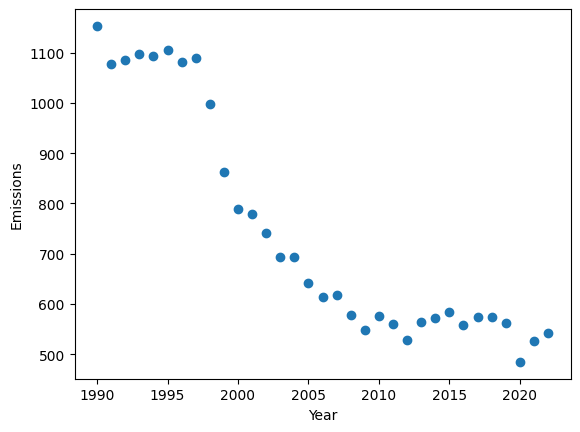

In [5]:
plt.scatter(df_em.year, df_em['Zinc'], label='Zinc')
#TODO plot some of the other emission types in the same way
plt.ylabel('Emissions')
plt.xlabel('Year')


Plots can be deceiving when there are different scales

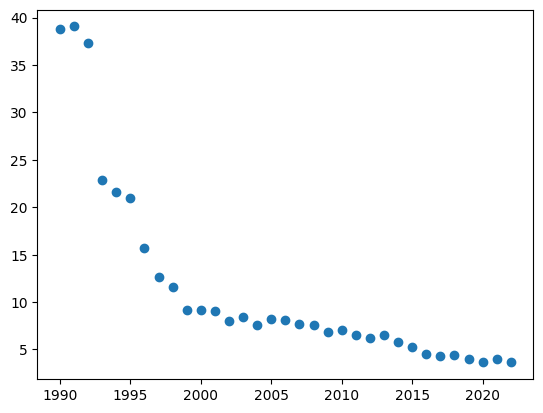

In [6]:
plt.scatter(df_em.year, df_em['Mercury'], label='Mercury')


Lets plot the fish lengths

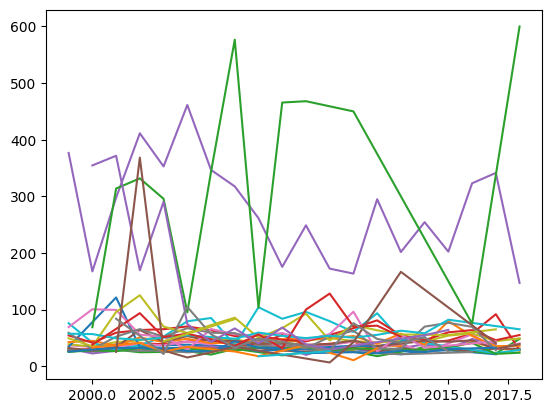

In [7]:
for fish in merged.Common_Name.unique():
  current_fish = merged[merged.Common_Name==fish]
  plt.plot(current_fish.year, current_fish.Length_mm)

Finding only the smaller fish
We want to find the fish that are small on average, to do this we must groupby Common_Name then take the mean of the Length_mm. Try to find those smaller than 100 mm

In [8]:

small_fish = merged.groupby('Common_Name').Length_mm.mean()<100

(0.0, 120.0)

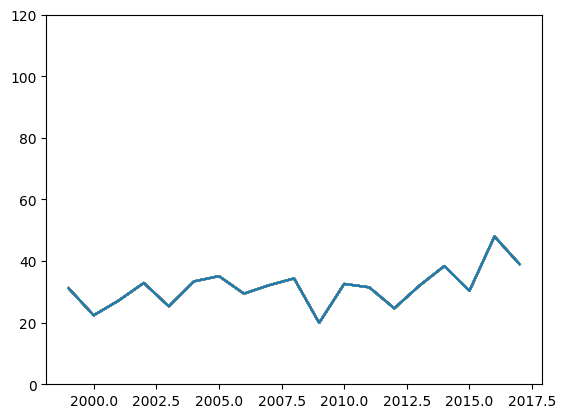

In [9]:
# TODO group the merged dataframe by Common_Name, take the mean of Length_mm, then check if these values are less than 100
# Assign this to smallfish

small_fish = small_fish[small_fish==True].index.values # We can then get the names of these fish, stored as indexes

for fish in small_fish:
  current_fish = merged[merged.Common_Name=='Bullhead']
  plt.plot(current_fish.year, current_fish.Length_mm)
plt.ylim([0,120])



Does fish length (of any fish species) correlate with emissions (of any kind)?
How do we find this out?


To make this easier, we might want a column for each fish species?
To do this we can use the pivot function https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html

In [10]:
import seaborn as sns
fish_lengths = merged.pivot(index='year', columns='Common_Name', values=['Length_mm'] ).drop_duplicates()
fish_lengths.columns = fish_lengths.columns.droplevel(0)
fish_lengths = fish_lengths.merge(merged[['year', 'Copper'] + elements], on='year', how='outer')


We can then apply a pairwise correlation to check for associations between all of the columns in the dataframe. This shows us that most of the emissions are strongly correlated, but most of the fish lengths are not.

<Axes: >

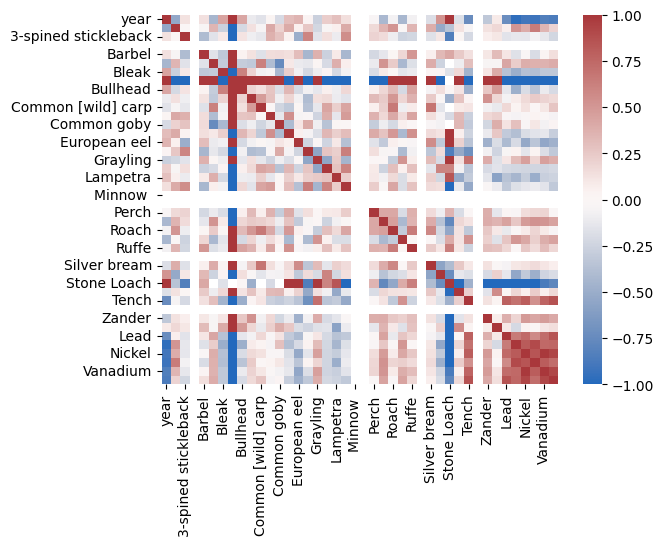

In [11]:
correlations = fish_lengths.corr()
sns.heatmap(correlations, cmap=sns.color_palette("vlag", as_cmap=True))

In [ ]:
correlations.shape


(42, 42)

Plotting the just the correlations between the fish lengths and the emissions (not fish against fish or emissions against emissions)

<Axes: >

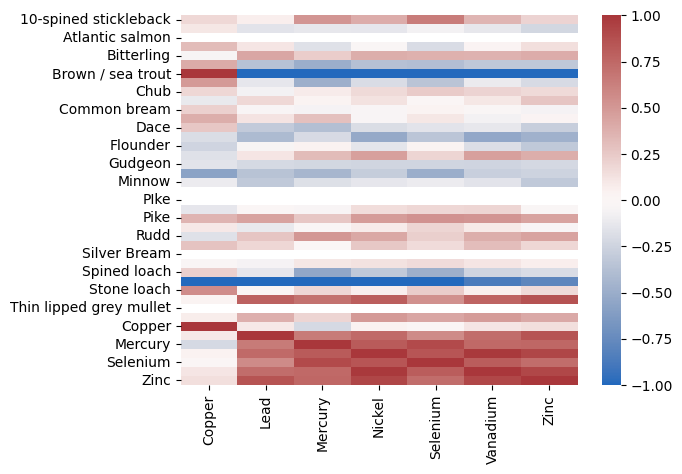

In [ ]:
sns.heatmap(correlations.iloc[1:, 35:], cmap=sns.color_palette("vlag", as_cmap=True))

Which fish show a strong correlation? If the correlation is 1 then we should be suspicious

In [ ]:
correlations[correlations.abs()>0.9]

,year,10-spined stickleback,3-spined stickleback,Atlantic salmon,Barbel,Bitterling,Bleak,Brown / sea trout,Bullhead,Chub,...,Tench,Thin lipped grey mullet,Zander,Copper,Lead,Mercury,Nickel,Selenium,Vanadium,Zinc
year,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.963126,-0.900491,-0.920789,NaN,NaN
10-spined stickleback,NaN,1.0,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-spined stickleback,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Atlantic salmon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barbel,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bitterling,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bleak,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brown / sea trout,1.000000,-1.0,-1.0,NaN,1.0,1.0,-1.0,1.0,1.0,1.0,...,-1.0,NaN,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
Bullhead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chub,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Is this just because they have small sample size?

In [16]:
#TODO apply the groupby function (grouping by Common_Name) to get the number of each type of fish
# Assign this to a variable called fish_numbers

fish_numbers = merged.groupby('Common_Name').size()
fish_numbers

,0
Common_Name,
10-spined stickleback,18
3-spined stickleback,20
Atlantic salmon,1
Barbel,18
Bitterling,9
Bleak,20
Brown / sea trout,2
Bullhead,19
Chub,20


In [19]:

well_sampled_fish = fish_numbers[fish_numbers<100].index
ws_corrs = correlations.loc[well_sampled_fish, ['Copper', 'Lead',	'Mercury',	'Nickel',	'Selenium',	'Vanadium',	'Zinc']]
ws_corrs

,Copper,Lead,Mercury,Nickel,Selenium,Vanadium,Zinc
Common_Name,,,,,,,
10-spined stickleback,0.175391,0.064146,0.512103,0.395587,0.640720,0.346771,0.200091
3-spined stickleback,0.106578,-0.154446,-0.126208,-0.140521,-0.066119,-0.131870,-0.232715
Atlantic salmon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barbel,0.320233,0.115896,-0.165293,-0.018228,-0.196090,0.025426,0.143560
Bitterling,-0.045122,0.428252,0.228447,0.383345,0.367222,0.365454,0.391241
Bleak,0.398551,-0.360399,-0.492741,-0.370682,-0.385142,-0.324553,-0.320487
Brown / sea trout,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
Bullhead,0.486860,-0.134999,-0.487457,-0.198807,-0.344797,-0.117056,-0.205182
Chub,0.186215,-0.068474,0.080693,0.168184,0.240576,0.199329,0.167199


<Axes: ylabel='Common_Name'>

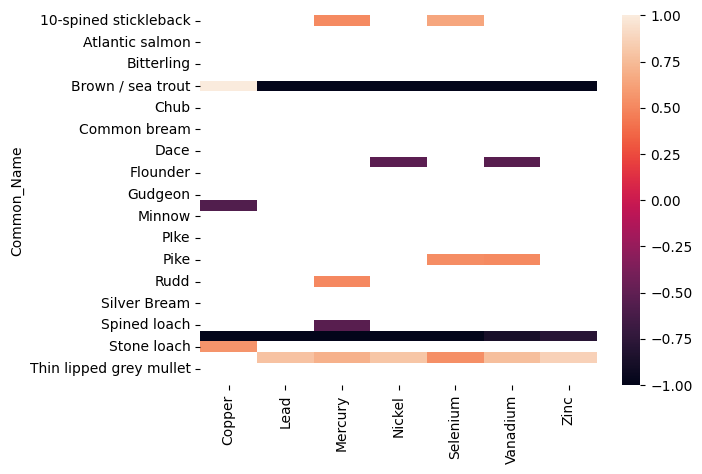

In [20]:
sns.heatmap(ws_corrs[ws_corrs.abs()>0.5])